# Feedback from check in 2
Ignoring the RNA data and analyzing the metadata (like the importance of age or her2_status_measured_by_snp6) on overall_survival. 

# Steps
1. Set up imports
2. Load data
3. Split into training and testing data
4. Train model to look for correlation between age and survival
5. Make plot and evaluate accuracy


In [5]:
#pip install scikit-learn
#pip install pandas


In [6]:
#pip install matplotlib

In [7]:
# set up imports
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load dataset
bc_df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')

# look at the shape of data
bc_df.shape

/tmp/ipykernel_9737/3041465478.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  bc_df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')


(1904, 693)

In [9]:
# look at dataframe
bc_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# look at data on overall survival
bc_df['overall_survival'].value_counts()

overall_survival
0    1103
1     801
Name: count, dtype: int64

In [ ]:
# Split data
X = bc_df[['age_at_diagnosis']]
y = bc_df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train data
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [22]:
# checking the age range
young = bc_df['age_at_diagnosis'].min()
old = bc_df['age_at_diagnosis'].max()

print(young, old)

21.93 96.29


/tmp/ipykernel_9737/3821168845.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bc_df.groupby('age_group')['overall_survival'].mean()


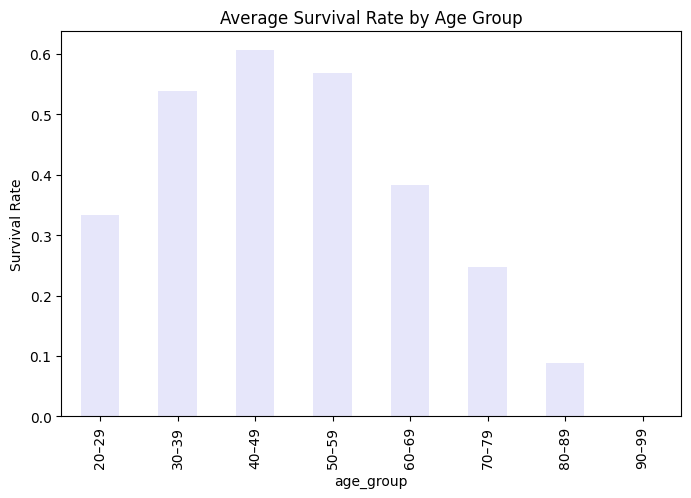

In [ ]:
# catagorize survival rate under certain age
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90–99']
bc_df['age_group'] = pd.cut(bc_df['age_at_diagnosis'], bins=age_bins, labels=age_labels, right=False)

# calculating survival rate for each age group
grouped = bc_df.groupby('age_group')['overall_survival'].mean()

# plot
grouped.plot(kind='bar', color='lavender')
plt.ylabel("Survival Rate")
plt.title("Average Survival Rate by Age Group")

plt.show()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


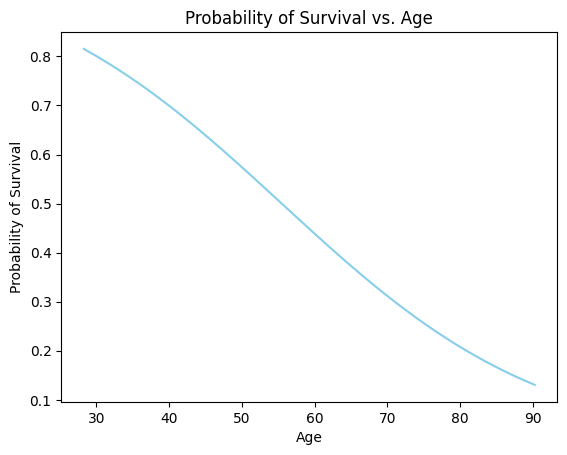

In [35]:
# predicting survival rate based on age
age_test = X_test['age_at_diagnosis'].values.reshape(-1, 1)
predicted_probs = model.predict_proba(age_test)[:, 1]

sorted_indices = np.argsort(age_test[:, 0])
sorted_ages = age_test[sorted_indices]
sorted_probs = predicted_probs[sorted_indices]

plt.plot(sorted_ages, sorted_probs, color='skyblue', label="Predicted Probability")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")
plt.title("Probability of Survival vs. Age")


plt.show()


In [19]:
# accurancy evaluation
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6115485564304461